# Results for paper: TITLE

This notebook contains the script used to create results for *link*

## Cyclohexane

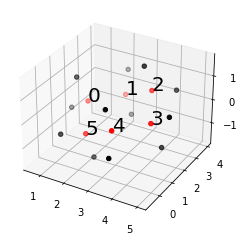

In [1]:
# The carbon atoms are arranged in the correct order to move along the ring.
cyclohexane_xyz = """
C      1.367908000      1.836044000     -0.049671000
C      2.329589000      3.011988000     -0.044238000
C      3.630888000      2.632672000      0.661249000
C      4.247092000      1.383956000      0.049671000
C      3.285411000      0.208012000      0.044238000
C      1.984112000      0.587328000     -0.661249000
H      2.524936000      3.113740000     -0.900292000
H      1.933922000      3.936128000      0.506802000
H      3.388552000      2.469096000      1.674854000
H      4.348450000      3.220000000      0.605369000
H      1.030575000      1.607424000      0.972471000
H      0.592407000      1.921052000     -0.581309000
H      4.584425000      1.612576000     -0.972471000
H      5.022593000      1.298948000      0.581309000
H      2.226448000      0.750904000     -1.674854000
H      1.266550000     -0.000000000     -0.605369000
H      3.090064000      0.106260000      0.900292000
H      3.681078000     -0.716128000     -0.506802000
"""

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import interactive
interactive(True)

# Uncomment to get an interactive plot 
# %matplotlib qt

x,y,z = [],[],[]
carbons = 6
cyclohexane = cyclohexane_xyz.split('\n')[1:-1]
for line in cyclohexane:
    items = line.split("     ")
    x.append(float(items[1]))
    y.append(float(items[2]))
    z.append(float(items[3]))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x[:6], y[:6], z[:6], c="red")
ax.scatter(x[6:], y[6:], z[6:], c="black")
for i in range(carbons):
    ax.text(x[i],y[i],z[i], '%s' %(str(i)), size=20, zorder=1, color='k')
plt.show()

In [2]:
# from nbed.mol_plot import draw_molecule

# mol_view = draw_molecule(cyclohexane,
#               width=400,
#                height=400,
#               jupyter_notebook=True)
# mol_view.show()

# Cyclohexane

## Reference Values 

In [3]:
# from pyscf import scf, cc

# print("Whole system DFT")
# ks = scf.RKS(molecule)
# ks.conv_tol = config["convergence"]
# ks.xc = config["xc_functional"]
# whole_dft = ks.kernel()
# print("")

# print("Hartree Fock")
# hf = scf.RHF(molecule)
# hf.conv_tol = config["convergence"]
# hf_energy = hf.kernel()
# print("")

# print("CCSD")
# ccsd = cc.CCSD(hf)
# ccsd.conv_tol = config["convergence"]
# whole_ccsd, *_ = ccsd.kernel()
# whole_ccsd += hf_energy

In [4]:
import nbed

/home/mwilliams/anaconda3/envs/nbed/lib/python3.7/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


In [6]:
from pathlib import Path
from pyscf.gto import Mole
import nbed
from nbed.driver import NbedDriver
from tqdm import tqdm_notebook as tqdm
from openfermion import count_qubits


localisation = ['spade','mullikan','boys','ipo']

# Need to build paths to xyz files.
base_path = Path("../tests/molecules/").absolute()
# molecules = {"water", "methanol", "ethane", "glycine"}
geometry = str(base_path / "cyclohexane.xyz")

basis='sto-3g'
xc_functional='b3lyp'
projector='huzinaga'
localization='spade'
convergence=1e-8
savefile=None
charge=0
mu_level_shift=1e6
run_ccsd_emb=True
run_fci_emb=False
max_ram_memory=8_000
pyscf_print_level=1

qhams = {}

for active in range(1,7):
    print(f"Running with {active} atoms:")
    driver = NbedDriver(
        geometry=geometry,
        n_active_atoms=active,
        basis=basis,
        xc_functional=xc_functional,
        projector=projector,
        localization=localization,
        convergence=convergence,
        savefile=savefile,
        charge=charge,
        mu_level_shift=mu_level_shift,
        run_ccsd_emb=run_ccsd_emb,
        run_fci_emb=run_fci_emb,
        max_ram_memory=max_ram_memory,
        pyscf_print_level=pyscf_print_level,
    )
    qhams[active] = driver.molecular_ham
    print(driver.classical_energy)
    num_qub = count_qubits(driver.molecular_ham)
    print(num_qub)
    print(driver._huzinaga['rhf'].mol.aoslice_by_atom()[0][-1])
    if num_qub > 13:
        break


Running with 1 atoms:
-207.1366560986124
38
5


Cycle through molecules to output the desired info.

In [ ]:
from openfermion import eigenspectrum
from openfermion import count_qubits

active_atoms = [i for i in range(7)]
#energies = [eigenspectrum(qham)[0] for qham in qhams.values()]
#n_qubits = [count_qubits(qham) for qham in qhams.values()]

energies = [eigenspectrum(qham) for qham in qhams.values()]
n_qubits = [count_qubits(qham) for qham in qhams.values()]


/home/mwilliams/anaconda3/envs/nbed/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


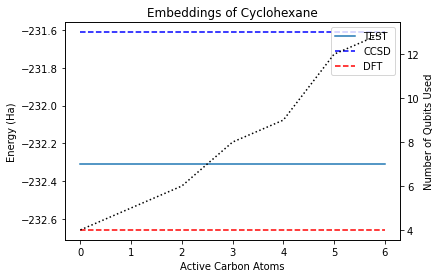

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.set_ylabel('Number of Qubits Used')
ax2.plot(n_qubits, linestyle='dotted', color='black')

ax.hlines(whole_ccsd, 0, 6, colors='blue', linestyle='dashed', label='CCSD')
ax.hlines(whole_dft, 0, 6, colors='red', linestyle='dashed', label='DFT')
ax.plot(active_atoms, energies, label='TEST')
ax.set_xlabel('Active Carbon Atoms')
ax.set_ylabel('Energy (Ha)')
ax.set_title('Embeddings of Cyclohexane')
ax.legend()
fig.show()